# Regression Metrics and Loss Functions

Regarding loss functions, for a model of the form $y = f(x) + \epsilon$ with predictions $\hat{y}_i$ and true values $y_i$ we have:

* The sum of squared errors:
$$\text{SSE} = \sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$

In this lesson we're going to dig deeper into loss functions and their applications. Different loss functions are useful in different scenarios and there are two very popular loss functions that are used in conjuction with regression. In this case they are sometimes referred to as _regression metrics_.

The first is the _mean squared error_ or _MSE_ and it is the mean of the squared errors. If we have $n$ regression points and their predictions, the [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) is:

$$\text{MSE} = {\frac{\sum_{i}{\left(\hat{y}_i - y_i \right)^2}}{n}}$$

The second is the _mean absolute error_ or _MAE_, and it differs by use of an absolute value instead of a square. The [MAE](https://en.wikipedia.org/wiki/Average_absolute_deviation) is:

$$\text{MAE} = \frac{\sum_{i}{|\hat{y}_i - y_i |}}{n}$$

## Why have different regression metrics?

You might be thinking, _what's all the fuss about_? It turns out that there are lots of good reasons to use different loss functions. We'll consider the effects of outliers on these two metrics.

First let's try a very simplified statistics problem. Given a dataset, how can we summarize it with a single number? Do you know any ways?

This is equivalent to fitting a constant model to the data. It turns out that the _mean_ minimizes the MSE and the _median_ minimizes the MAE. By analogy, when fitting a model, MAE is more tolerant to outliers. In other words, the degree of error of an outlier has a large impact when using MSE versus the MAE. Since the choice of loss function affects model fit, it's important to consider how you want errors to impact your models.

**Summary**
* Use MAE when how far off an error is makes little difference
* Use MSE when more extreme errors should have a large impact

Finally, note that linear regressions with MAE instead of MSE are called _least absolute deviation_ regressions rather than _least squares_ regressions.

### Bonus: Modes

It turns out the _mode_ minimizes the sum:
$$\frac{\sum_{i}{|\hat{y}_i - y_i |^{0}}}{n}$$
where $0^0=0$ and $x^0=1$ otherwise. Can you see why?


# Guided practice

Let's compute the MSE and the MAE for a sample data set. Let's say we had a quadratic function to which we fit a straight line:

In [40]:
xs = [-1, 0, 1, 2, 3]
# function is y = x**2 + 1
ys = [x**2 + 1 for x in xs] # true values
predictions = [2*x for x in xs] # predictions from model y = 2x
print(ys)
print(predictions)

[2, 1, 2, 5, 10]
[-2, 0, 2, 4, 6]


In [41]:
% matplotlib inline
from __future__ import print_function, division
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
#plt.rcParams['figure.figsize'] = 10, 10

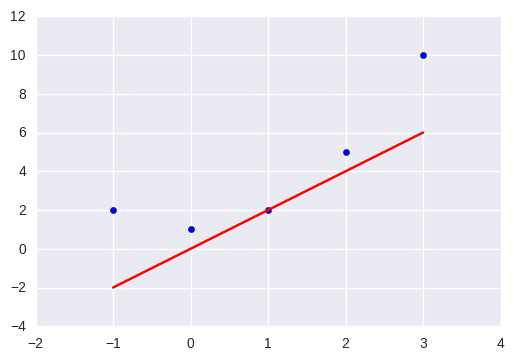

In [42]:
# to clarify, this looks like this:
plt.scatter(xs, ys)
plt.plot(xs, predictions, color="red")
plt.show()

First do the calculation by hand to see how large each term is

- MSE= 34/4

- MAE= 10/4



In [43]:
# try writing a function that calculates this
def mean_squared_error_mine(values,predictions):
    return sum([(values[i]-predictions[i])**2 for i in range(len(values))])/len(values)
print(mean_squared_error_mine(ys,predictions))

def mean_absolute_error_mine(values,predictions):
    return sum([np.abs(values[i]-predictions[i]) for i in range(len(values))])/len(values)
mean_absolute_error_mine(ys,predictions)

6.8


2.0

In [44]:
# thankfully sklearn can do this for us
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE:", mean_squared_error(ys, predictions))
print("RMSE:", np.sqrt(mean_squared_error(ys, predictions)))
print("MAE:", mean_absolute_error(ys, predictions))

MSE: 6.8
RMSE: 2.60768096208
MAE: 2.0


Now let's add an outlier to the data.

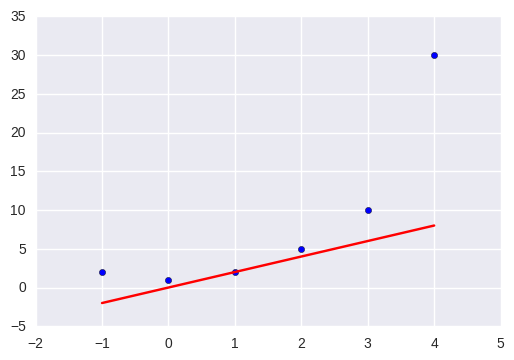

In [45]:
xs.append(4)
ys.append(30)
predictions.append(8)

plt.scatter(xs, ys)
plt.plot(xs, predictions, color="red")
plt.show()

In [46]:
print("MSE:", mean_squared_error(ys, predictions))
print("RMSE:", np.sqrt(mean_squared_error(ys, predictions)))
print("MAE:", mean_absolute_error(ys, predictions))

MSE: 86.3333333333
RMSE: 9.29157324318
MAE: 5.33333333333


Notice that the impact on the RMSE (3.5x) was larger than the impact on the MAE (2.5x)
- What does this imply for algorithms that operate by minimising the MSE vs the MAE?

# Independent Practice

Let's explore two scenarios to obtain a better understanding of MSE and MAE. First let's fit two models to the same set of data, the data above. To do the least mean absolute error we will use `statsmodels`.

In [47]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [48]:
# Let's change the underlying function with a few more randomised points
xs.append(2.5)
ys.append(17)
xs.append(1.5)
ys.append(-6)

In [49]:
df = pd.DataFrame(np.array([xs, ys]).transpose(), columns=["x", "y"])
df.columns = ["x", "y"]
df

,x,y
0,-1.0,2.0
1,0.0,1.0
2,1.0,2.0
3,2.0,5.0
4,3.0,10.0
5,4.0,30.0
6,2.5,17.0
7,1.5,-6.0


In [50]:
# fit the model using statsmodels formula api, which reads in a patsy formatted formula
# and adds a constant term for you
# we will use ordinary least squares as our fit algorithm (ols)
# the formula says 'predict y based on x'
from __future__ import with_statement 
mod= smf.ols('y ~ x',data=df)
res=mod.fit()
res.summary()

/home/dsi-student/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     7.108
Date:                Tue, 25 Oct 2016   Prob (F-statistic):             0.0372
Time:                        10:44:12   Log-Likelihood:                -27.090
No. Observations:                   8   AIC:                             58.18
Df Residuals:                       6   BIC:                             58.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.7211      4.281     -0.168      0.872       -11.195     9.753
x              5.1361      1.926      2.666      0.037         0.422     9.850
==============================================================================
Omnibus:                        0.205   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.340
Skew:                          -0.253   Prob(JB):                        0.844
Kurtosis:                       2.125   Cond. No.                         3.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

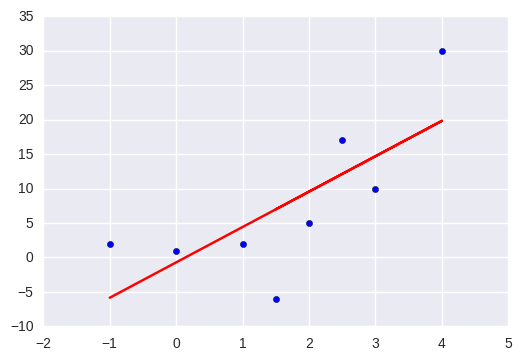

In [51]:
# plot the resulting line and the underlying points
plt.scatter(df["x"], df["y"])
plt.plot(df["x"], res.predict(), color="red")
plt.show()

In [52]:
import statsmodels.api as sm
# if you use the non formula api (sm rather than smf), you specify the target and predictors based on the order of input
# and you must manually add a constant (try without to see what happens)
# since forgetting to add a constant is fairly easy to do, you may well find the formula api best
# but just be aware that both work and you may well find implementations of both online
X = np.array(xs).transpose()
print(X)

[-1.   0.   1.   2.   3.   4.   2.5  1.5]


In [53]:
X = sm.add_constant(X)
print(X)

[[ 1.  -1. ]
 [ 1.   0. ]
 [ 1.   1. ]
 [ 1.   2. ]
 [ 1.   3. ]
 [ 1.   4. ]
 [ 1.   2.5]
 [ 1.   1.5]]


In [65]:
# Fit and summarize OLS model with non formula api
# did you notice this is called with capital letters instead of lower case? that's a convention to help you
# remember you are using the non formula api in this case
mod = sm.OLS(ys, X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     7.108
Date:                Tue, 25 Oct 2016   Prob (F-statistic):             0.0372
Time:                        10:49:37   Log-Likelihood:                -27.090
No. Observations:                   8   AIC:                             58.18
Df Residuals:                       6   BIC:                             58.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.7211      4.281     -0.168      0.872       -11.195     9.753
x1             5.1361      1.926      2.666      0.037         0.422     9.850
==============================================================================
Omnibus:                        0.205   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.340
Skew:                          -0.253   Prob(JB):                        0.844
Kurtosis:                       2.125   Cond. No.                         3.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

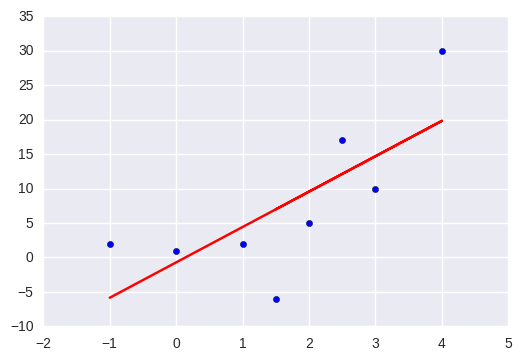

In [66]:
# plot the results
plt.scatter(X[:,1], ys)
plt.plot(X[:,1], res.predict(), color="red")
plt.show()


In [67]:
# an alternative algorithm to ordinary least squares, quantile regression with
# quantile of 0.5, which is the special case of the least absolute deviation (lad) algorithm
mod = smf.quantreg('y ~ x', df)
res2 = mod.fit(q=.5)
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.2857
Model:                       QuantReg   Bandwidth:                       23.30
Method:                 Least Squares   Sparsity:                        35.27
Date:                Tue, 25 Oct 2016   No. Observations:                    8
Time:                        10:49:43   Df Residuals:                        6
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0000      9.142      0.109      0.916       -21.369    23.369
x              3.0000      4.114      0.729      0.493        -7.067    13.067
==============================================================================
"""

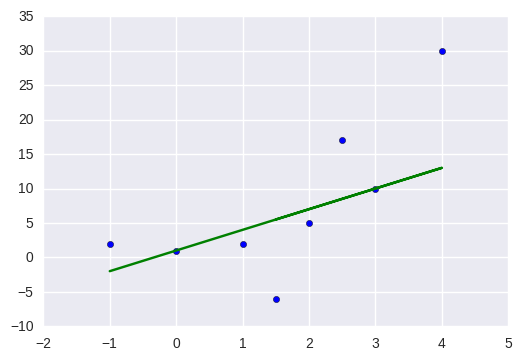

In [68]:
# plot this fit and the underlying data
# plot the resulting line and the underlying points
plt.scatter(df["x"], df["y"])
plt.plot(df["x"], res2.predict(), color="green")
plt.show()

### Exercise
- What are the different formulae for the fits you have gotten?
- Plot the fits all together in one graph
- Which fits the best visually?
- We were investigating the difference in a linear fit between using MSE and MAE. Which algorithm used which? (check documentation)

Generally speaking you would likely use OLS for a linear fit. But be aware there are several other algorithms and LAD has the advantage that it is more resistant to outliers. It is your job as a data scientist to consider which is the best algorithm for the situation at hand (after all, the computer could calculate the fit on its own!)

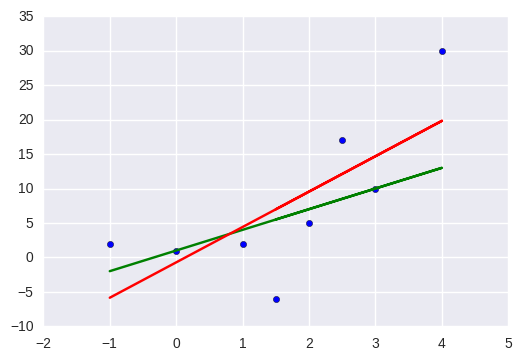

In [69]:
# plot the fits together
plt.scatter(X[:,1], ys)
plt.plot(df["x"], res2.predict(), color="green")
plt.plot(X[:,1], res.predict(), color="red")
plt.show()

Finally, let's explore another scenario. Linear regression has five major assumptions, one of which is called _constant variance_ or _homoscedasticity_. It means that the errors are distributed with the same variance about the best fit line regardless of the value of the independent variables.

For example, a persistant level of background noise can cause regression metrics to be poorly estimated. Let's take a look.

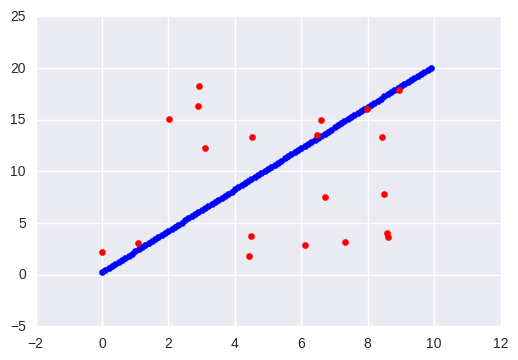

In [73]:
import random
from scipy.stats import norm

# Generate some data on a straight line
xs = list(np.arange(0, 10, 0.1))
ys = [2*x + norm.pdf(0, 1) for x in xs]
# Add random background noise
xs2 = [10 * random.random() for i in range(20)]
ys2 = [20 * random.random() for i in range(20)]

# Plot the data sets
plt.scatter(xs, ys, color='b')
plt.scatter(xs2, ys2, color='r')
plt.show()

In [78]:
# Combine the data


In [ ]:
# Fit a line to the data with MSE implementation in statsmodels
# Compute the MSE and the MAE
# Plot the regression line


In [ ]:
# Now try a MAE regression with statsmodels and plot it.
# You should see a much better fit.


In [ ]:
# Plot the data and the two fits


In [ ]:
# plot the same fit with sklearn linear_model
from sklearn import linear_model